# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # Generamos un varible que sube el valor
# mínimo 4 puntos y multiplicamos por la pendiente. El último sumando creo que
# es el error

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

In [3]:
import matplotlib.pyplot as plt #Para visualizar los datos 
%matplotlib inline 

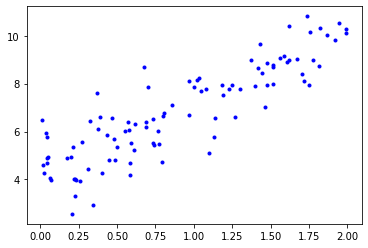

In [7]:
plt.plot(X, y, "b.") #la b de blue y queremos que aoarezcan puntos. Plot para
# definir la gráfica
plt.show() #Show para enseñar la gráfica
# A medida que aumentan los equipos afectados aumenta el coste

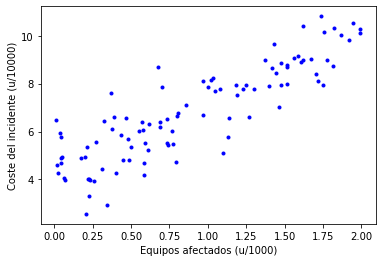

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()
# Hay un coste básico incial sea cual sea el número de equipos que se estropean 
# (40mil ud, es ese intercept que hemos puesto al definir el modelo)

### 3. Modificación del conjunto de datos

In [9]:
import pandas as pd

In [10]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()} # COn el método
# a partir del diccionario generamos una tabla. Todo minúsculas, nada de tildes,
# todo con guiones bajos. El flatten nos lleva a una lista porque en numpy tenemos
# lista de listas
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.036318,5.919941
1,1.585029,9.136026
2,0.970853,8.098371
3,1.017233,8.170388
4,0.970585,6.703356
5,0.071530,3.971741
6,0.311923,4.457064
7,1.249972,7.939228
8,0.259583,3.920118
9,1.718712,8.120847


In [11]:
# Escalado del número de equipos afectados - si tenemos número de equipos y 
# número de personas puede salir una beta que parezca muy pequeña cuando en 
# realidad lo que pasa es que tenemos x e y en diferente escala
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,36,59199
1,1585,91360
2,970,80983
3,1017,81703
4,970,67033
5,71,39717
6,311,44570
7,1249,79392
8,259,39201
9,1718,81208


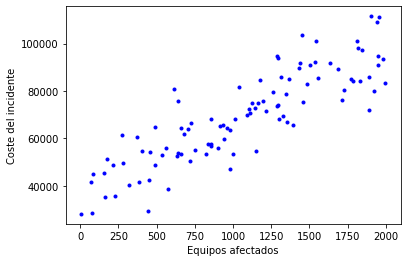

In [ ]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

In [14]:
from sklearn.linear_model import LinearRegression #Módulo del modelo de regresión
# lineal por todas las transformaciones que tiene este modelo (transformadas de 
# variables sería otro modelo, igual que los modelos de regresión lineal por
# partes típico en series temporales. Instanciamos la calse de Linear Regression

In [15]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)
# fit para referirnos al proceso de entrenamiento en sklearn, tenemos la variable 
# regresora con un .values para sacar vectores y luego reshape pq necesitamos una 
# matriz. .values para pasar de pandas a arrays
# Cosas mal: no hemos dividido entre train y test, algo de shuffle pero hoy da 
# igual solo queremos ver como funciona la regresión lineal

LinearRegression()

In [18]:
# Parámetro theta 0
lin_reg.intercept_ #el guión bajo porque no podemos dar el intercep y que quede
# fijo si no que debe cambiarse solo con los datos mediante algún proceso

42241.43274333785

In [17]:
# Parámetro theta 1
lin_reg.coef_

array([28.90430194])

Y = 37328.14 + 30.22*X

In [21]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max) #función predict me da el vector de 
# predicciones de cada columna de la matriz que hemos generado arriba

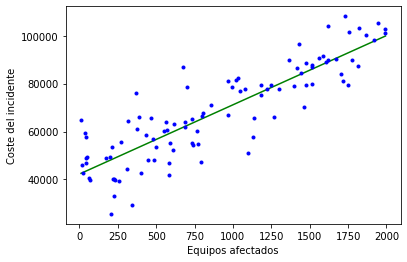

In [23]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()


### 5. Predicción de nuevos ejemplos

In [24]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 79817 €


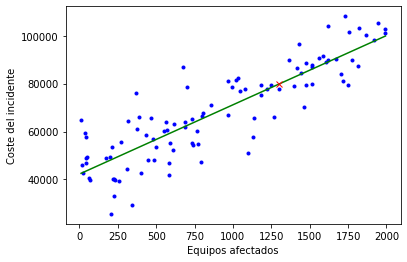

In [25]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()